# Reward samples from physical robot interactions
See: https://www.tokic.com/the-crawling-robot/
![title](https://github.com/micheltokic/crawlingrobot/blob/master/hardware-robot-reward-model.png?raw=true)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Actions refer to columns in RewardModel 
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
ACTIONS =          np.array([ UP,   RIGHT,   DOWN,   LEFT], dtype=int)
ACTIONS_READABLE =          ["UP", "RIGHT", "DOWN", "LEFT"]

In [2]:
###################################
## Definition of reward model
### (no need to do anything here!)
###################################

# grid size
ROWS = 5
COLS = 5

RewardModel = np.zeros((COLS, ROWS, len(ACTIONS)))

# 1. row (ACTIONS: UP, RIGHT, DOWN, LEFT)
RewardModel[0][0] = [  0,  0,  0,   0]
RewardModel[0][1] = [  0,  0,  0,   0]
RewardModel[0][2] = [  0,  0,  0,   0]
RewardModel[0][3] = [  0,  0,  0,   0]
RewardModel[0][4] = [  0,  0,  0,   0]
# 2.row
RewardModel[1][0] = [  0,  0,  0,   0]
RewardModel[1][1] = [  0,  0,  0,   0]
RewardModel[1][2] = [  0,  0,  0,   0]
RewardModel[1][3] = [  0,  0,  4,   0]
RewardModel[1][4] = [  0,  0,  6,   0]
#3. row
RewardModel[2][0] = [  0,  0,  9,   0]
RewardModel[2][1] = [  0,  0, 11,   0]
RewardModel[2][2] = [  0, 15,  0,   0]
RewardModel[2][3] = [ -3, 12, 17, -10]
RewardModel[2][4] = [ -4,  0, 16, -11]
#4. row
RewardModel[3][0] = [ -5, 17, 19,   0]
RewardModel[3][1] = [ -9, 17, 20,  -8]
RewardModel[3][2] = [-16, 13, 19, -12]
RewardModel[3][3] = [-18, 12, 23, -14]
RewardModel[3][4] = [-16,  0, 23, -18]
#5. row
RewardModel[4][0] = [ -8, 14,  0,   0]
RewardModel[4][1] = [-26, 16,  0,  -6]
RewardModel[4][2] = [-18,  9,  0, -14]
RewardModel[4][3] = [-26, 10,  0, -15]
RewardModel[4][4] = [-30,  0,  0, -15]

print (RewardModel)

[[[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]]

 [[  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   0.   0.]
  [  0.   0.   4.   0.]
  [  0.   0.   6.   0.]]

 [[  0.   0.   9.   0.]
  [  0.   0.  11.   0.]
  [  0.  15.   0.   0.]
  [ -3.  12.  17. -10.]
  [ -4.   0.  16. -11.]]

 [[ -5.  17.  19.   0.]
  [ -9.  17.  20.  -8.]
  [-16.  13.  19. -12.]
  [-18.  12.  23. -14.]
  [-16.   0.  23. -18.]]

 [[ -8.  14.   0.   0.]
  [-26.  16.   0.  -6.]
  [-18.   9.   0. -14.]
  [-26.  10.   0. -15.]
  [-30.   0.   0. -15.]]]


In [12]:
#Aufgabe 1

####################################
# Implement ValueIteration function
####################################
def ValueIteration (R, maxIterations = 10000, theta = 0.000001, gamma=0.999):
    
    rows, cols = R.shape[0:2]
    print("Rows: ", rows, " Cols: ", cols)
    
    V = np.zeros((rows, cols))
    pi = np.zeros((rows, cols), dtype=int)
    
    iteration = 0
    end = False
    while (end == False):
        
        error = 0
        iteration += 1
        
        for x in range( 0, cols):
            for y in np.arange (0, rows):
        
                bestNewV = -np.inf
                
                for action in ACTIONS:
                    newX = x;
                    newY = y;
                    reward = R[y][x][action]

                    ## TODO: Recompute newX/newY according to action to be evaluated
                    ##       => Forbid actions across grid boundaries!
                    if action == DOWN: #wieso bei down y+1?????
                        if (y+1) < rows:
                            newY = y+1
                        else:
                            continue
                    if action == UP:
                        if (y-1) >= 0:
                            newY = y-1
                        else:
                            continue
                    if action == LEFT:
                        if (x-1) >= 0:
                            newX = x-1
                        else:
                            continue
                    if action == RIGHT:
                        if (x+1) < cols:
                            newX = x+1
                        else:
                            continue

                    ## TODO:  recompute value of current state
                    newV = reward + gamma * V[newY, newX]
                    
                    ## TODO: memorize estimated best action and hightes V value in current state s
                    if newV > bestNewV:
                        bestNewV = newV
                        bestAction = action

                ## TODO: measure maximum value error in current iteration
                error = max (error, abs(bestNewV - V[y, x]))
                
                # update estimated state value and policy action
                V[y][x] = bestNewV
                pi[y][x] = bestAction
#Aufgabe 2:                
        ## TODO: check iteration termination
        if (error < theta or iteration >= maxIterations):
            end = True
            print ("Ending at iteration #%d" % iteration)
            print ("Cum. error = %f" % error)
    return V, pi, iteration, error

In [4]:
###################################
### Plot policy function
### (no need to do anything here!)
###################################
def plotPolicy (policy, gamma):

    cols, rows = policy.shape

    Y = np.arange (0, rows)
    X = np.arange (0, cols)
    YN, XN = np.meshgrid(Y, X)
    #print ("XN=%s" % XN)
    #print ("YN=%s" % YN)

    for row in np.arange(0, rows, 1):
        for col in X:

            toX = 0
            toY = 0

            action = policy[row][col]
            if action == UP:
                toY = -1
            elif action == DOWN:
                toY = +1
            elif action == RIGHT:
                toX = +1
            elif action == LEFT:
                toX = -1

            ## TODO: Adapt for x/y boundaries
            XN[row][col] = toX
            YN[row][col] = toY
        print("")

    
    
    fig, ax = plt.subplots()
    q = ax.quiver(X, Y, XN, YN, angles="xy")
    plt.xlabel ("x")
    plt.ylabel ("y")
    plt.xticks(np.arange(0, 5, 1))
    plt.yticks(np.arange(0, 5, 1))
    plt.title ("gamma=%.3f" % gamma)
    
    ## reverse Y-axis => in order that plot fits to above image
    plt.gca().invert_yaxis()  
    ## move x labels to top of plot
    ax.xaxis.tick_top()
    
    plt.show()

Rows:  5  Cols:  5
Ending at iteration #2
Cum. error = 0.000000
V=[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   4.   6.]
 [  9.  11.  15.  17.  16.]
 [ 19.  20.  19.  23.  23.]
 [ 14.  16.   9.  10. -15.]]
policy (numeric)=
[[1 1 1 1 2]
 [0 0 0 2 2]
 [2 2 1 2 2]
 [2 2 2 2 2]
 [1 1 1 1 3]]
policy (readable)=
[['RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'DOWN']
 ['UP' 'UP' 'UP' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'RIGHT' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'LEFT']]







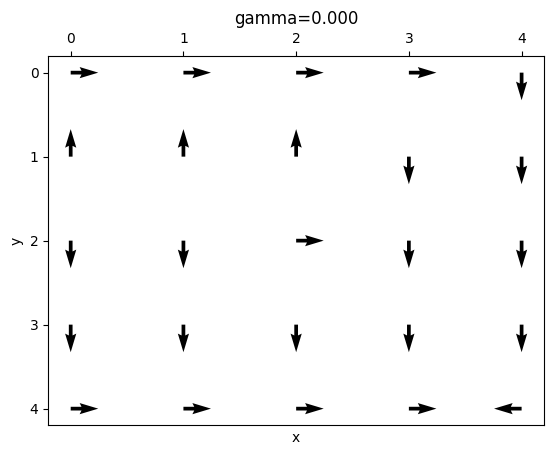

Rows:  5  Cols:  5
Ending at iteration #8
Cum. error = 0.000001
V=[[  0.11057      0.1316986    0.16938586   0.59385859   0.78158586]
 [  1.1056986    1.31698586   1.69385859   5.93858586   7.81585859]
 [ 11.05698586  13.16985859  16.93858586  19.38585859  18.15858586]
 [ 20.56985859  21.69858586  19.98585859  23.85858586  21.58585859]
 [ 15.69858586  16.98585859   9.85858586   8.58585859 -14.14141414]]
policy (numeric)=
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 1 2 2]
 [2 2 2 2 2]
 [1 1 1 1 3]]
policy (readable)=
[['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'RIGHT' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'LEFT']]







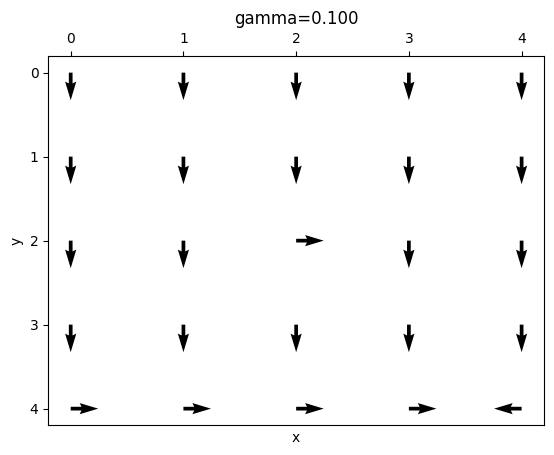

Rows:  5  Cols:  5
Ending at iteration #11
Cum. error = 0.000006
V=[[  1.48316344   1.68587623   2.00998687   3.39995606   3.75418682]
 [  4.94387623   5.61958687   6.69995606  11.33318682  12.51395605]
 [ 16.47958687  18.73195606  22.33318682  24.44395605  21.71318681]
 [ 24.93195606  25.77318682  22.24395605  24.81318681  19.04395604]
 [ 19.77318682  19.24395605  10.81318681   6.04395604 -13.18681319]]
policy (numeric)=
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 1 2 2]
 [2 2 2 2 2]
 [1 1 1 1 3]]
policy (readable)=
[['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'RIGHT' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'LEFT']]







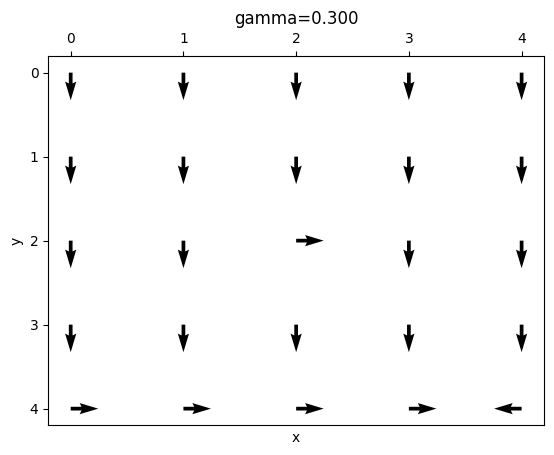

Rows:  5  Cols:  5
Ending at iteration #15
Cum. error = 0.000010
V=[[  6.29166985   6.58333492   7.41666746   9.33333373   9.04166687]
 [ 12.58333492  13.16666746  14.83333373  18.66666687  18.08333343]
 [ 25.16666746  26.33333373  29.66666687  29.33333343  24.16666672]
 [ 32.33333373  30.66666687  25.33333343  24.66666672  16.33333336]
 [ 24.66666687  21.33333343  10.66666672   3.33333336 -13.33333332]]
policy (numeric)=
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 1 2 2]
 [1 2 1 2 2]
 [1 1 1 1 3]]
policy (readable)=
[['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'RIGHT' 'DOWN' 'DOWN']
 ['RIGHT' 'DOWN' 'RIGHT' 'DOWN' 'DOWN']
 ['RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'LEFT']]







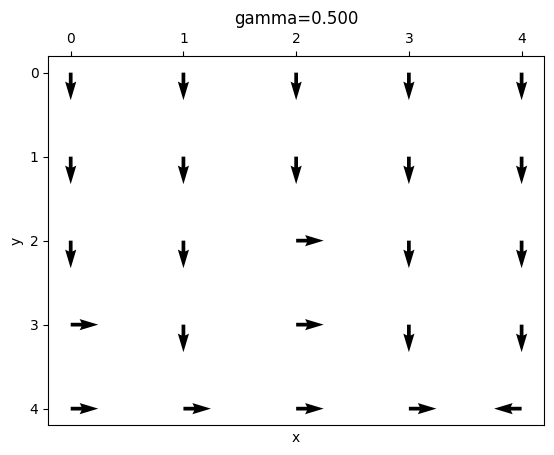

Rows:  5  Cols:  5
Ending at iteration #25
Cum. error = 0.000005
V=[[ 19.13280238  18.09257127  18.53852789  18.78360952  16.16272667]
 [ 27.33257127  25.84652789  26.48360952  26.83372667  23.08960867]
 [ 39.04652789  36.92360952  37.83372667  32.61960867  24.41372607]
 [ 42.92360952  37.03372667  28.61960867  22.31372607  12.01960825]
 [ 29.27372667  21.81960867   8.31372607  -0.98039175 -15.68627423]]
policy (numeric)=
[[2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 1 2 2]
 [1 1 1 2 2]
 [1 1 1 1 3]]
policy (readable)=
[['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'RIGHT' 'DOWN' 'DOWN']
 ['RIGHT' 'RIGHT' 'RIGHT' 'DOWN' 'DOWN']
 ['RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'LEFT']]







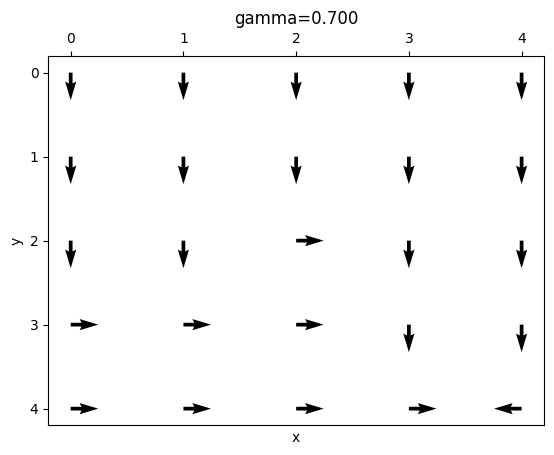

Rows:  5  Cols:  5
Ending at iteration #36
Cum. error = 0.000007
V=[[ 30.55127976  27.14909421  25.90436337  23.58045069  18.86436055]
 [ 38.18909421  33.93636337  32.38045069  29.47556055  23.58044844]
 [ 47.73636337  42.42045069  40.47556055  31.84444844  21.95555876]
 [ 48.42045069  39.27556055  27.84444844  18.55555876   7.444447  ]
 [ 30.73636055  19.64444844   4.55555876  -5.555553   -19.4444424 ]]
policy (numeric)=
[[2 2 2 2 2]
 [2 2 2 2 3]
 [2 2 1 2 2]
 [1 1 1 2 2]
 [0 1 1 1 3]]
policy (readable)=
[['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'DOWN' 'LEFT']
 ['DOWN' 'DOWN' 'RIGHT' 'DOWN' 'DOWN']
 ['RIGHT' 'RIGHT' 'RIGHT' 'DOWN' 'DOWN']
 ['UP' 'RIGHT' 'RIGHT' 'RIGHT' 'LEFT']]







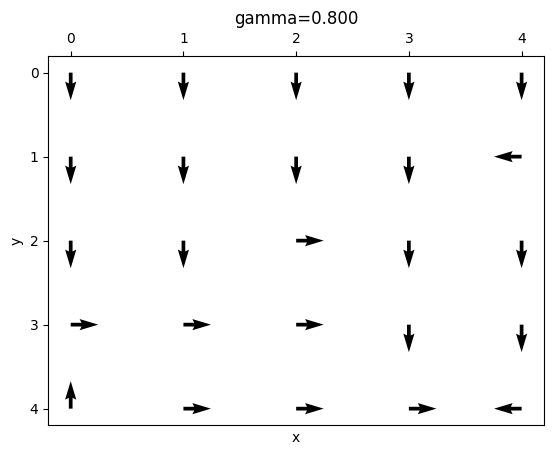

Rows:  5  Cols:  5
Ending at iteration #46
Cum. error = 0.000009
V=[[ 38.30382105  33.07830988  29.23856968  25.04831076  21.29106415]
 [ 45.06330988  38.91565446  34.39831076  29.46859785  25.04830817]
 [ 53.01565446  45.78311639  40.46859785  29.96305159  19.11359385]
 [ 51.78311639  40.92131035  25.96305159  15.25064673   3.66304972]
 [ 36.01564893  24.61330159   6.92130635  -9.1168896  -22.74935616]]
policy (numeric)=
[[2 2 2 2 2]
 [2 2 2 2 3]
 [2 2 1 2 2]
 [1 2 1 2 2]
 [0 3 3 3 3]]
policy (readable)=
[['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'DOWN' 'LEFT']
 ['DOWN' 'DOWN' 'RIGHT' 'DOWN' 'DOWN']
 ['RIGHT' 'DOWN' 'RIGHT' 'DOWN' 'DOWN']
 ['UP' 'LEFT' 'LEFT' 'LEFT' 'LEFT']]







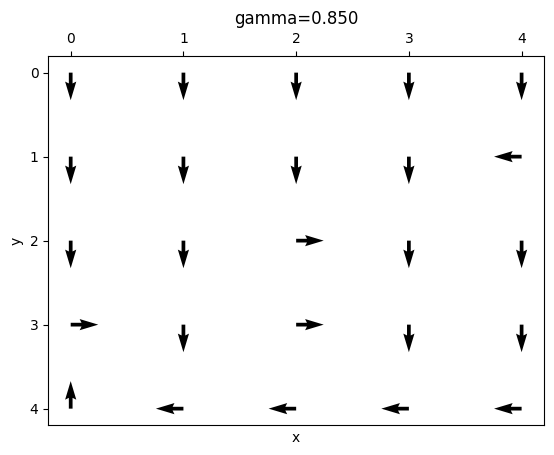

Rows:  5  Cols:  5
Ending at iteration #67
Cum. error = 0.000009
V=[[58.81813602 52.93632241 47.64269017 42.87842116 38.59057904]
 [65.35349342 58.81814408 52.93632967 47.64269671 42.87842704]
 [72.61499017 65.35349116 58.81814204 44.24749704 34.59058433]
 [70.68332967 59.64814204 42.08332784 30.27499505 16.04749555]
 [55.61499671 44.05349704 25.64814733  8.0833326  -7.72500066]]
policy (numeric)=
[[2 2 2 2 2]
 [2 2 2 3 3]
 [2 3 3 2 0]
 [1 2 2 2 2]
 [0 3 3 3 3]]
policy (readable)=
[['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'LEFT' 'LEFT']
 ['DOWN' 'LEFT' 'LEFT' 'DOWN' 'UP']
 ['RIGHT' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['UP' 'LEFT' 'LEFT' 'LEFT' 'LEFT']]







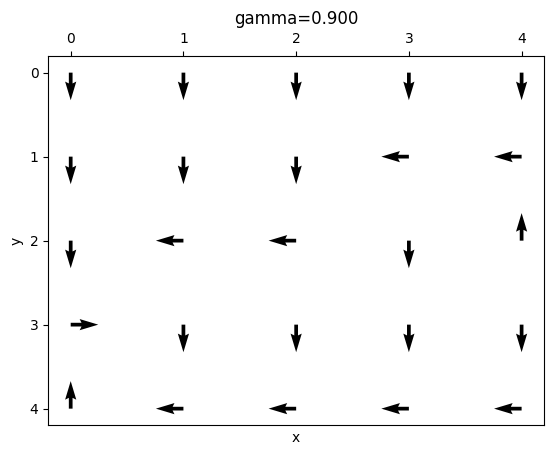

Rows:  5  Cols:  5
Ending at iteration #699
Cum. error = 0.000010
V=[[579.04751078 573.25703568 567.52446532 561.84922067 556.23072846]
 [584.8964853  579.04752045 573.25704524 567.52447479 561.84923004]
 [590.80453915 584.89649376 579.04752882 563.25705353 552.23073774]
 [587.68136224 576.44582882 558.68137053 539.80115683 530.70843036]
 [573.80454862 562.06650313 542.4458381  522.02137972 501.80116592]]
policy (numeric)=
[[2 2 2 2 2]
 [2 2 2 3 3]
 [2 3 3 3 0]
 [1 2 3 2 0]
 [0 3 3 3 3]]
policy (readable)=
[['DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN']
 ['DOWN' 'DOWN' 'DOWN' 'LEFT' 'LEFT']
 ['DOWN' 'LEFT' 'LEFT' 'LEFT' 'UP']
 ['RIGHT' 'DOWN' 'LEFT' 'DOWN' 'UP']
 ['UP' 'LEFT' 'LEFT' 'LEFT' 'LEFT']]







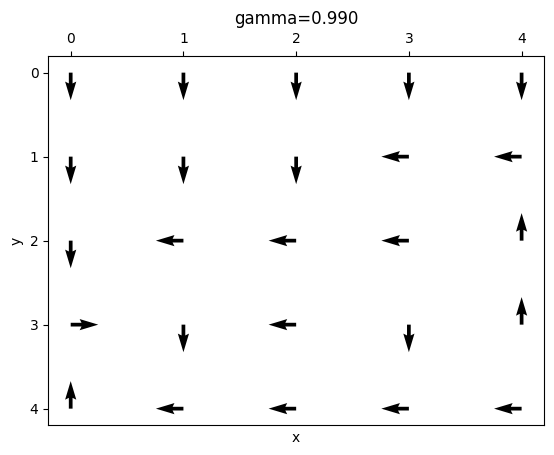

In [13]:
#Aufgabe 3:
#################################################
### Learn and plot policy for given R and gamma
#################################################
# Run value iteration
#array analog zu Ansatz aus Übung 1
list_gamma = [0, 0.1, 0.3, 0.5, 0.7, 0.8, 0.85, 0.9, 0.99]
iterations = []
policies = []
#gamma = 0.99

for gamma in list_gamma:
    V, policy, iteration, error = ValueIteration(R=RewardModel, gamma=gamma, theta=0.00001, maxIterations=10000)
    iterations.append(iteration)
    policies.append(policy)
    print ("V=%s" % V)

    # construct array with readable actions
    print ("policy (numeric)=\n%s" % policy)
    policyReadable = np.array([[ACTIONS_READABLE[int(e)] for e in sub] for sub in policy])
    print ("policy (readable)=\n%s" % policyReadable)

    # Plot policy
    plotPolicy (policy=policy, gamma=gamma)

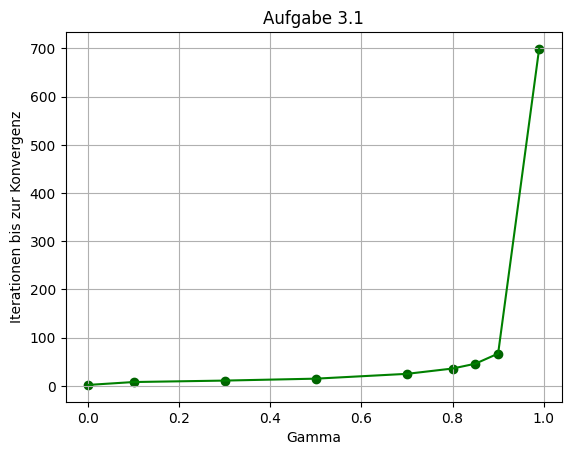

In [8]:
#Aufgabe 3.1
plt.xlabel('Gamma')
plt.ylabel('Iterationen bis zur Konvergenz')
plt.title('Aufgabe 3.1')
plt.plot(list_gamma, iterations, color='green')
plt.scatter(list_gamma, iterations, color='darkgreen', label='Punkte', marker='o')
plt.grid(True)
plt.show()

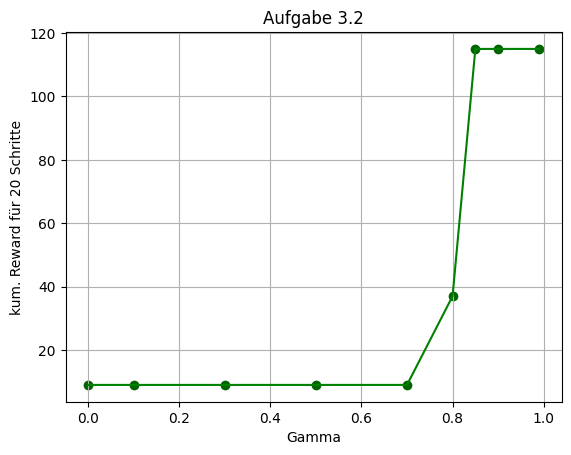

In [29]:
### Aufgabe 3.2
rewards = []
rows = 5
cols = 5

# For all gammas
for i in range(0, len(list_gamma)):
    kum_reward = 0
    policy = policies[i]
    
    # Initial position
    x = 0
    y = 4
    #werden koordinaten des punktes so korrekt gelesen?
    
    for j in range(0,20):
        #print(x_pos, y_pos)
        action = policy[y][x]
        kum_reward += RewardModel[y][x][action]
        
        if action == 2: #down
            if (y+1) < rows:
                y += 1
            else:
                continue
        if action == 0: #up
            if (y-1) >= 0:
                y -= 1
            else:
                continue
        if action == 3: #left
            if (x-1) >= 0:
                x -= 1
            else:
                continue
        if action == 1: # right
            if (x+1) < cols:
                x += 1
            else:
                continue
                
    #print("Policy: ", policy, " with kum_reward: ", kum_reward)
    rewards.append(kum_reward)
    
plt.xlabel('Gamma')
plt.ylabel('kum Reward für 20 Schritte')
plt.title('Aufgabe 3.2')
plt.plot(list_gamma, rewards, color='green')
plt.scatter(list_gamma, rewards, color='darkgreen', label='Punkte', marker='o')
plt.grid(True)
plt.show()

In [ ]:
#Aufgabe 5: